In [3]:
import os
import sys
import pathlib
import numpy as np
import tensorflow as tf
from random import sample
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn

# ---------------------------------------------------------------------

# setup environment
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.enable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ---------------------------------------------------------------------

# base directory for test images
IMAGES_TEST_DIR = \
    pathlib.Path(os.path.abspath('')).parent.resolve() / "images" / "test"

# ---------------------------------------------------------------------

# directory of kitti test images
KITTI_DIR = \
    IMAGES_TEST_DIR / "kitti"

# all the kitti test images
KITTI_IMAGES = \
    [img for img in (KITTI_DIR / "files").glob("*.png")]

# ---------------------------------------------------------------------

resnet_color_1x5_non_shared_bn_16x3x3_128x128


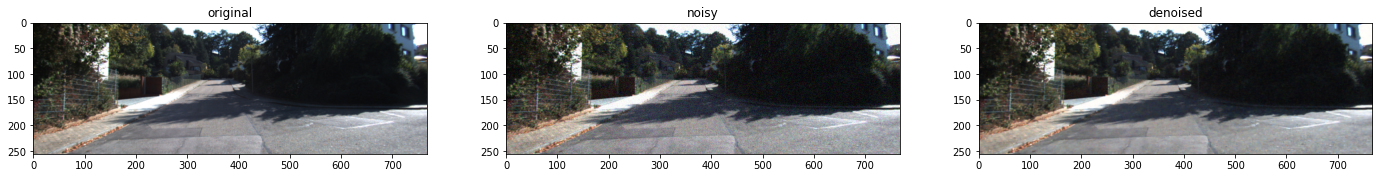

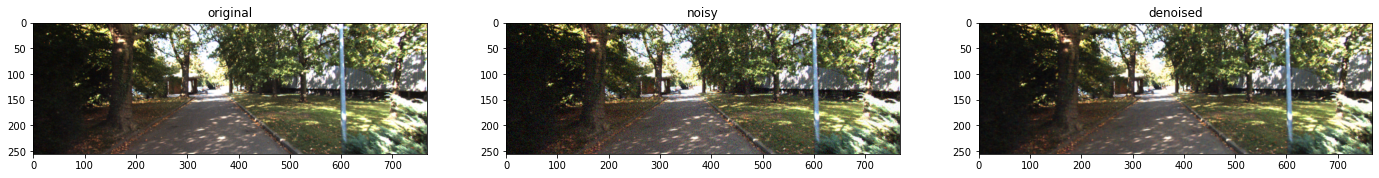

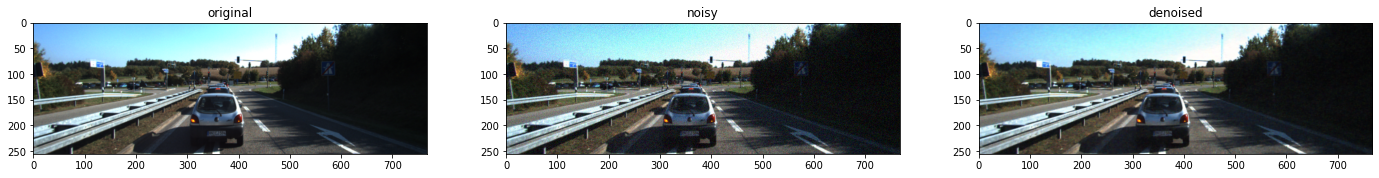

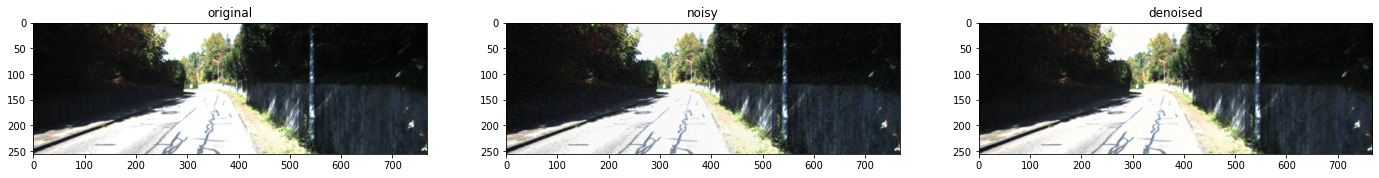

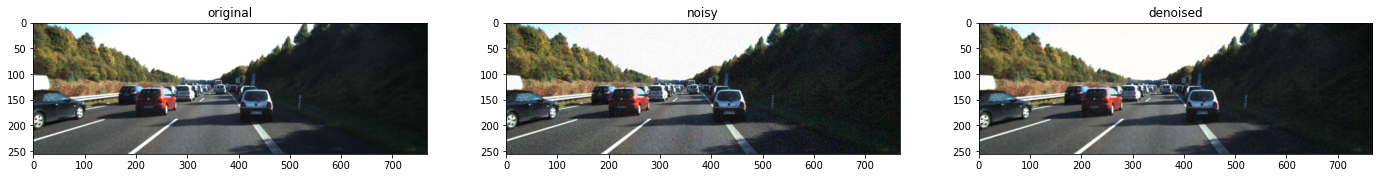

resnet_color_1x5_non_shared_bn_16x3x3_128x128_skip_input


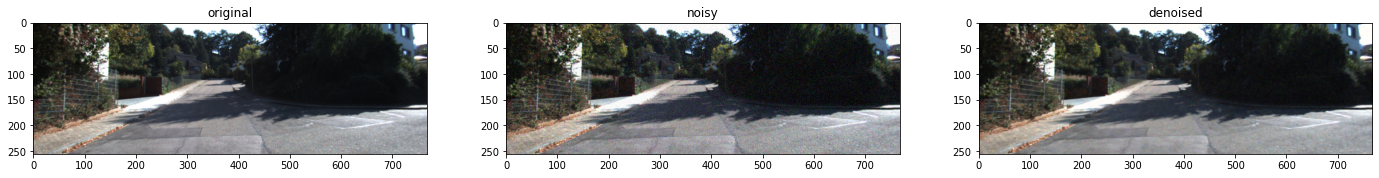

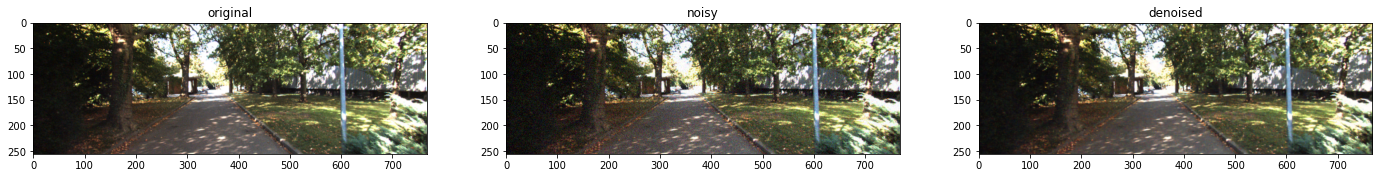

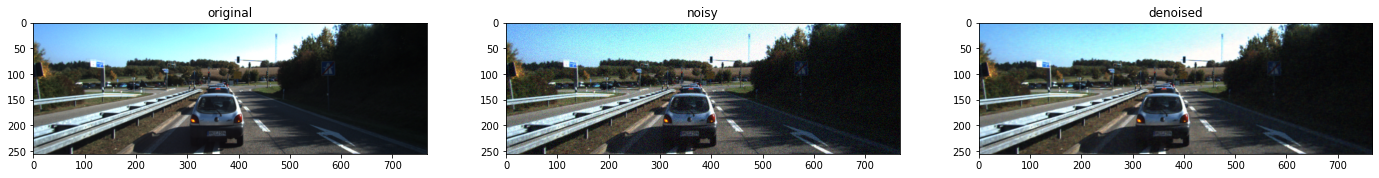

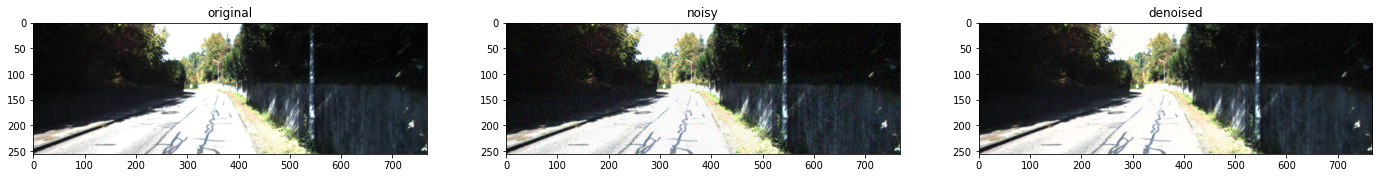

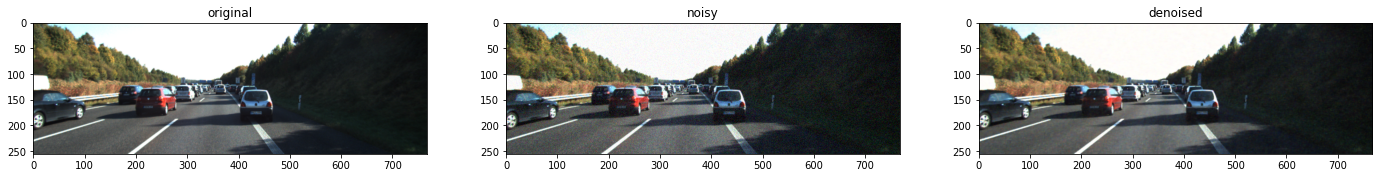

In [4]:
KITTI_IMAGES_SAMPLE = sample(KITTI_IMAGES, 5)

for model_name, model_structure in bfcnn.pretrained_models.items():
    print(model_name)
    model = model_structure["load_tf"]()
    for img_path in KITTI_IMAGES_SAMPLE:
        img = \
            tf.keras.preprocessing.image.load_img(
                path=img_path,
                color_mode="rgb",
                target_size=(256, 768),
                interpolation="bilinear")
        img_original = \
            tf.keras.preprocessing.image.img_to_array(
                img=img)
        img_original = tf.cast(img_original, dtype=tf.float32)
        img_original = tf.expand_dims(img_original, axis=0)

        img_noisy = \
            img_original + \
            tf.random.truncated_normal(
                seed=0,
                mean=0,
                stddev=15,
                shape=img_original.shape)
        img_noisy = tf.clip_by_value(img_noisy, clip_value_min=0, clip_value_max=255)
        img_noisy = tf.round(img_noisy)
        img_noisy = tf.cast(img_noisy, dtype=tf.uint8)
        img_original = tf.cast(img_original, dtype=tf.uint8)
        img_denoised = model(img_noisy)
        img_original = img_original.numpy()
        img_denoised = img_denoised.numpy()
        assert img_denoised.shape == img_original.shape
        assert img_denoised.shape == img_noisy.shape

        norm = plt.Normalize(0,256)
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
        im0 = axes[0].imshow(img_original[0,:,:,:], norm=norm)
        im1 = axes[1].imshow(img_noisy[0,:,:,:], norm=norm)
        im2 = axes[2].imshow(img_denoised[0,:,:,:], norm=norm)
        axes[0].set_title(f"original")
        axes[1].set_title(f"noisy")
        axes[2].set_title(f"denoised")
        plt.show()